In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scienceplots

# Set the plot style
plt.style.use(["science", "nature"])
DPI = 600
FIGSIZE = (13, 8)
SMALL_SIZE = 20
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.rc("font", size=SMALL_SIZE)  # controls default text sizes
plt.rc("axes", titlesize=MEDIUM_SIZE)  # fontsize of the axes title
plt.rc("axes", labelsize=MEDIUM_SIZE)  # fontsize of the x and y labels
plt.rc("xtick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("ytick", labelsize=SMALL_SIZE)  # fontsize of the tick labels
plt.rc("legend", fontsize=SMALL_SIZE)  # legend fontsize
plt.rc("figure", titlesize=BIGGER_SIZE)  # fontsize of the figure title

csv_file = "final_hint_quality_metrics.csv"

df = pd.read_csv(csv_file)
df.groupby("Model")["HGood"].mean()

Model
Phi-3-SFT-Hints        0.84
Phi-3-SFT-Merged       0.92
Phi-3-SFT-Repair       0.20
Phi-3-mini             0.16
Phi-3-mini-advanced    0.64
Name: HGood, dtype: float64

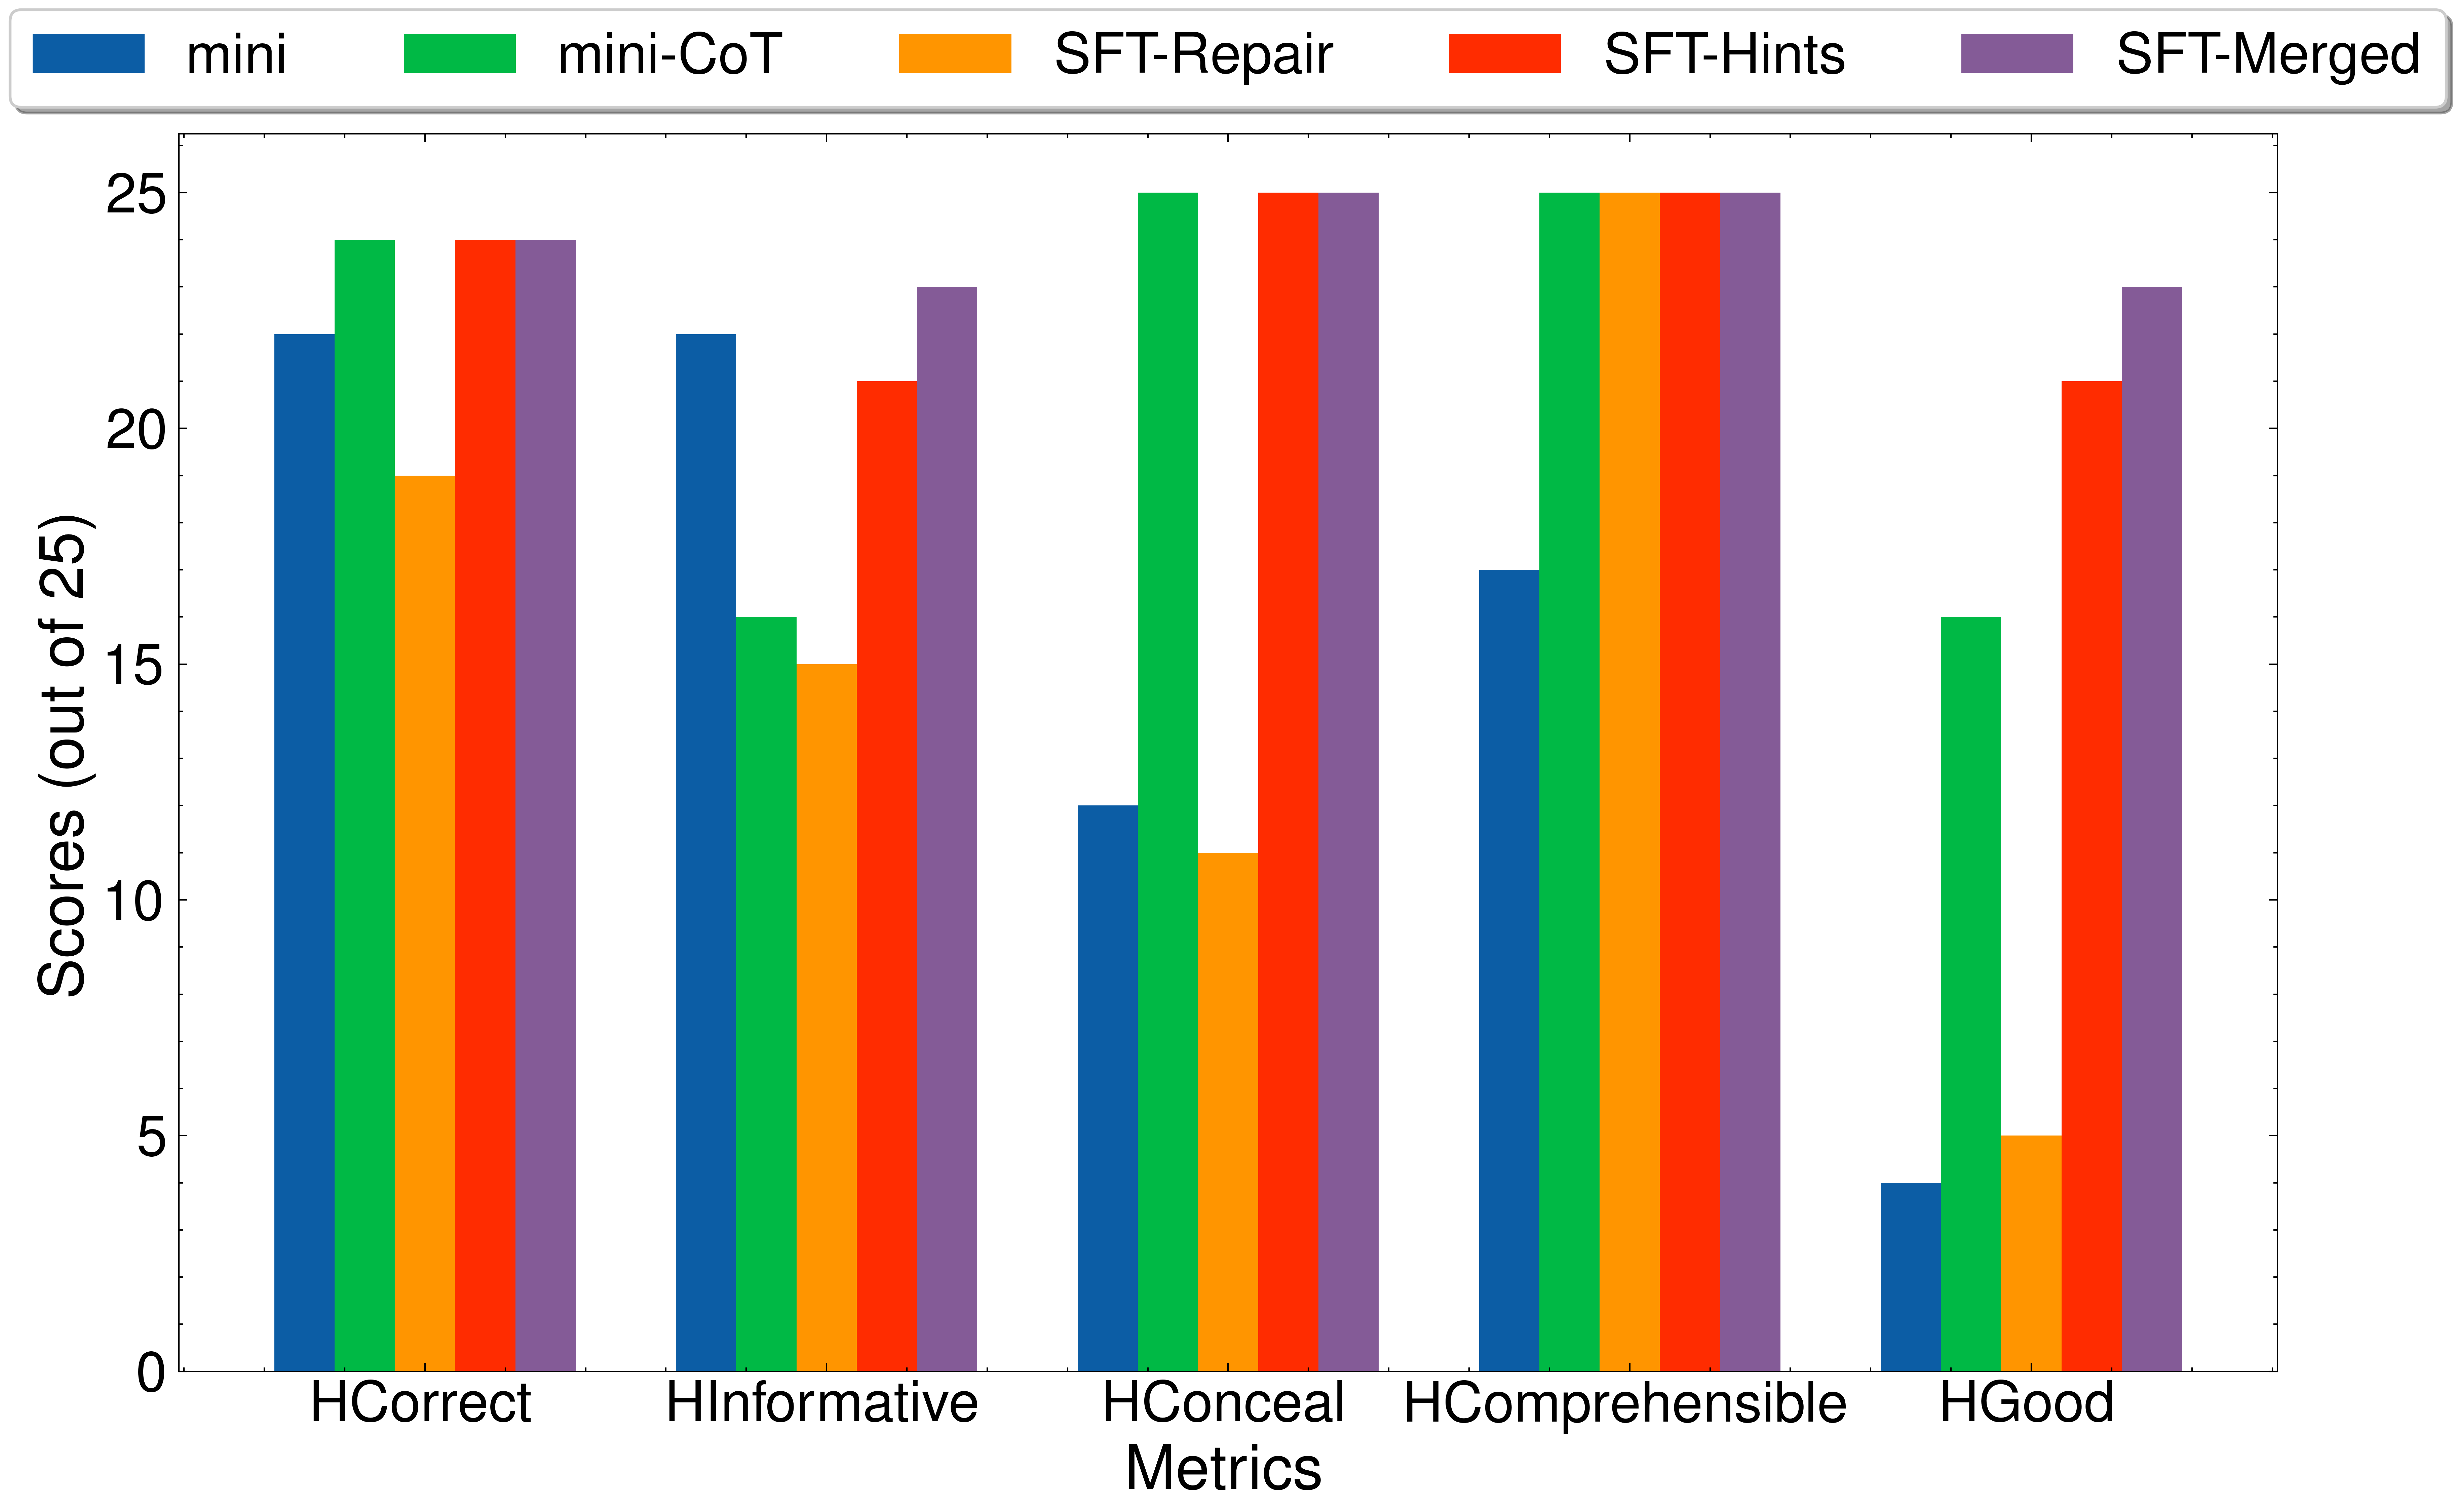

In [3]:
metric_list = ["HCorrect", "HInformative", "HConceal", "HComprehensible", "HGood"]
model_names = df["Model"].unique()
num_metrics = len(metric_list)
num_models = len(model_names)

# Calculate total score per metric and model
model_metric_scores = {}
for model in model_names:
    model_df = df[df["Model"] == model]
    metric_scores = {}
    for metric in metric_list:
        metric_scores[metric] = model_df[metric].sum()
    model_metric_scores[model] = metric_scores

# Plotting
bar_width = 0.15
index = range(num_metrics)

fig, ax = plt.subplots(figsize=FIGSIZE, dpi=DPI)

for i, model in enumerate(model_names):
    scores = [model_metric_scores[model][metric] for metric in metric_list]
    plt.bar(
        [p + bar_width * i for p in index],
        scores,
        bar_width,
        label=model.replace("Phi-3-", "")
        .replace("-mini", "-base")
        .replace("-advanced", "-CoT")
        .replace("-SFT-Repair", "-Repair")
        .replace("-SFT-Hints", "-Hints")
        .replace("-SFT-Merged", "-Merged"),
    )

plt.xlabel("Metrics")
plt.ylabel("Scores (out of 25)")
plt.xticks([p + bar_width * (num_models - 1) / 2 for p in index], metric_list)
plt.yticks(range(0, 26, 5))
plt.legend(
    loc="upper center",
    bbox_to_anchor=(0.5, 1.1),
    ncol=5,
    fancybox=True,
    shadow=True,
    borderaxespad=0,
    frameon=True,
    # facecolor='lightgray',  # Explicitly set the facecolor
    # edgecolor='black',      # Explicitly set the edgecolor
    # framealpha=1.0         # Ensure the frame is opaque
)
plt.tight_layout()
plt.savefig("images/all_models_hint_metrics_plot.pdf", format="pdf", dpi=DPI, bbox_inches="tight")
plt.show()
plt.close()